<a href="https://colab.research.google.com/github/wilferalexander/Ejercicio-k-Nearest-Neighbor/blob/main/Clasificar_con_K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio k-Nearest Neighbor**

## Impotar Librerias

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

**Leemos nuestro archivo de entrada**

In [2]:
df = pd.read_csv(r"/content/drive/MyDrive/Alura/MachineLearning/Clasificar con K-Nearest-Neighbor/reviews_sentiment.csv",sep=';')
df.head(10)

Review Title  \
0                Sin conexión   
1                faltan cosas   
2  Es muy buena lo recomiendo   
3             Version antigua   
4                   Esta bien   
5                       Buena   
6               De gran ayuda   
7                   Muy buena   
8                Ta to guapa.   
9            Se han corregido   

                                         Review Text  wordcount  \
0  Hola desde hace algo más de un mes me pone sin...         23   
1                 Han mejorado la apariencia pero no         20   
2                               Andres e puto amoooo          4   
3  Me gustana mas la version anterior esta es mas...         17   
4                    Sin ser la biblia.... Esta bien          6   
5        Nada del otro mundo pero han mejorado mucho          8   
6   Lo malo q necesita de …,pero la app es muy buena         23   
7  Estaba más acostumbrado al otro diseño, pero e...         16   
8                                    Va de escándalo         21   
9  Han corregido muchos fallos pero el diseño es ...         13   

  titleSentiment textSentiment  Star Rating  sentimentValue  
0       negative      negative            1       -0.486389  
1       negative      negative            1       -0.586187  
2            NaN      negative            1       -0.602240  
3            NaN      negative            1       -0.616271  
4       negative      negative            1       -0.651784  
5       positive      negative            1       -0.720443  
6       positive      negative            1       -0.726825  
7       positive      negative            1       -0.736769  
8       positive      negative            1       -0.765284  
9       negative      negative            1       -0.797961

In [4]:
#Aprovechamos a ver un resumen estadístico de los datos:
df.describe()

wordcount  Star Rating  sentimentValue
count  257.000000   257.000000      257.000000
mean    11.501946     3.420233        0.383849
std     13.159812     1.409531        0.897987
min      1.000000     1.000000       -2.276469
25%      3.000000     3.000000       -0.108144
50%      7.000000     3.000000        0.264091
75%     16.000000     5.000000        0.808384
max    103.000000     5.000000        3.264579

Son 257 registros. Las estrellas lógicamente vemos que van del 1 al 5. La cantidad de palabras van de 1 sóla hasta 103. y las valoraciones de sentimiento están entre -2.27 y 3.26 con una media de 0,38 y a partir del desvío estándar podemos ver que la mayoría están entre 0,38-0,89 y 0,38+0,89.

**Rápidas visualizaciones**

**Este código:**

    1. Crea histogramas individuales para cada columna.
    2. Utiliza make_subplots para crear una figura con subplots.
    3. Añade cada histograma a un subplot diferente.
    4. Actualiza el diseño de la figura para ajustarla al contenido.
    5. Muestra la figura con todos los subplots.

Con esto, tendremos los tres histogramas en una sola figura, organizados en tres filas.

In [13]:
# Crear los histogramas individuales
fig1 = px.histogram(df, x='wordcount')
fig2 = px.histogram(df, x='Star Rating')
fig3 = px.histogram(df, x='sentimentValue')

# Crear la figura de subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=('Word Count', 'Star Rating', 'Sentiment Value'))

# Añadir los histogramas a los subplots
fig.add_trace(go.Histogram(x=df['wordcount'], name='Word Count'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Star Rating'], name='Star Rating'), row=2, col=1)
fig.add_trace(go.Histogram(x=df['sentimentValue'], name='Sentiment Value'), row=3, col=1)

# Actualizar el diseño
fig.update_layout(height=800, width=600, title_text="Histograms of Different Columns")

# Mostrar la figura
fig.show()


Vemos que la distribución de “estrellas” no está balanceada… esto no es bueno. Convendría tener las mismas cantidades en las salidas, para no tener resultados “tendenciosos”. Para este ejercicio lo dejaremos así, pero en la vida real, debemos equilibrarlos. La gráfica de Valores de Sentimientos parece bastante una campana movida levemente hacia la derecha del cero y la cantidad de palabras se centra sobre todo de 0 a 10.

In [14]:
print(df.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


Veamos realmente cuantas Valoraciones de Estrellas tenemos:

Con eso confirmamos que hay sobre todo de 3 y 5 estrellas.



**Este código:**

  1. Usa px.histogram de Plotly Express para crear un gráfico de barras que    cuenta el número de ocurrencias de cada valor en la columna Star Rating.
  2. Agrega un título y etiquetas para los ejes.
  3. Ajusta el aspecto del gráfico con bargap para espaciar un poco las barras.
  4. Mostramos el gráfico.

In [17]:
#sb.factorplot('Star Rating',data=dataframe,kind="count", aspect=3)

# Crear el gráfico de barras de conteo
fig = px.histogram(df, x='Star Rating', color= 'Star Rating',
                   title='Conteo de Calificaciones por Estrellas',
                   labels={'Star Rating':'Calificación por Estrellas', 'count':'Conteo'})

# Ajustar el aspecto del gráfico
fig.update_layout(bargap=0.2)

# Mostrar el gráfico
fig.show()

**Este código:**

  1. Usa px.histogram de Plotly Express para crear un gráfico de barras que cuenta el número de ocurrencias de cada valor en la columna Star Rating.
  2. Utiliza el argumento color para asignar un color diferente a cada barra según el valor de Star Rating.
  3. Agrega un título y etiquetas para los ejes.
  4. Ajusta el aspecto del gráfico con bargap para espaciar un poco las barras.
  5. Mostramos el gráfico.

In [21]:
# Crear el gráfico de barras de conteo para la columna 'wordcount' con diferentes colores para cada barra
fig = px.histogram(df, x='wordcount', color='wordcount',
                   title='Conteo de Wordcount',
                   labels={'wordcount':'Word Count', 'count':'Conteo'})

# Ajustar el aspecto del gráfico
fig.update_layout(bargap=0.2)

# Mostrar el gráfico
fig.show()


Graficamos mejor la cantidad de palabras y confirmamos que la mayoría están entre 1 y 10 palabras.

**Preparamos el dataset**

**Selecciona las características y la variable objetivo:**

X contiene las características wordcount y sentimentValue.
y contiene la variable objetivo Star Rating.

** Divide los datos en conjuntos de entrenamiento y prueba:**

train_test_split divide X y y en conjuntos de entrenamiento (X_train, y_train) y prueba (X_test, y_test).

**Normaliza las características:**

MinMaxScaler escala las características para que estén en el rango [0, 1].

**train_test_split:**
Divide los datos en entrenamiento y prueba. Aquí se usa random_state=0 para asegurar reproducibilidad.

**MinMaxScaler:**
Escala los datos entre 0 y 1. Primero ajusta el scaler con los datos de entrenamiento (fit_transform), y luego aplica la misma transformación a los datos de prueba (transform).

Este proceso es esencial para la mayoría de los modelos de machine learning para asegurar que las características estén en una escala comparable.


In [22]:
# Seleccionar características y variable objetivo
X = df[['wordcount','sentimentValue']].values
y = df['Star Rating'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Normalizar las características
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Creamos el Modelo**

**Importación de librerías:**

  KNeighborsClassifier de sklearn.neighbors se usa para crear el clasificador K-NN.

**Entrenamiento del modelo:**

 knn = KNeighborsClassifier(n_neighbors) crea un clasificador K-NN con 7 vecinos.
knn.fit(X_train, y_train) entrena el clasificador con los datos de entrenamiento.

**Evaluación del modelo:**

knn.score(X_train, y_train) calcula la precisión del modelo en el conjunto de entrenamiento.
knn.score(X_test, y_test) calcula la precisión del modelo en el conjunto de prueba.
--

Este proceso permite evaluar cómo de bien está funcionando el clasificador tanto en los datos con los que fue entrenado como en datos no vistos durante el entrenamiento. Es una buena práctica comparar ambas precisiones para detectar si el modelo está sobreajustado (overfitting) o subajustado (underfitting).

In [23]:
# Configurar y entrenar el clasificador K-NN
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

# Evaluar el clasificador
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


Vemos que la precisión que nos da es de 90% en el set de entrenamiento y del 86% para el de test.

NOTA: como verán utilizamos la clase KNeighborsClassifier de SciKit Learn puesto que nuestras etiquetas son valores discretos (estrellas del 1 al 5). Pero deben saber que también existe la clase KneighborsRegressor para etiquetas con valores continuos.

**Resultados obtenidos**

**Importación de funciones:**

confusion_matrix y classification_report se importan desde sklearn.metrics para evaluar el rendimiento del clasificador.

**Predicción:**

pred = knn.predict(X_test) realiza predicciones sobre el conjunto de prueba.

**Evaluación del modelo:**

confusion_matrix(y_test, pred) genera una matriz de confusión que muestra el número de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.
classification_report(y_test, pred) proporciona un informe detallado que incluye precisión, recuperación, puntuación F1 y soporte para cada clase.

La matriz de confusión te ayudará a entender en qué medida el modelo está acertando o fallando para cada clase. El reporte de clasificación te ofrece métricas adicionales para evaluar la calidad del clasificador en términos de precisión y recuperación.

In [24]:
# Hacer predicciones en el conjunto de prueba
pred = knn.predict(X_test)


# Evaluar el clasificador
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



**go.Figure(data=go.Heatmap(...)):**

Crea un gráfico de calor usando Plotly. z es la matriz de confusión, x y y son las etiquetas para los ejes X e Y, respectivamente.

**colorscale='Blues':**

Define el esquema de colores del gráfico.
colorbar=dict(title='Conteo'): Añade una barra de colores con el título 'Conteo'.

**fig.update_layout(...):**

Configura el diseño del gráfico, incluyendo el título y las etiquetas de los ejes.

**fig.show():**

Muestra el gráfico interactivo.
Este código te permite visualizar de manera efectiva cómo el clasificador K-NN está funcionando en términos de la matriz de confusión, lo que facilita la evaluación de su rendimiento.

In [30]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, pred)

# Crear el gráfico de calor para la matriz de confusión
fig = go.Figure(data=go.Heatmap(
    z=cm,
    x=[f'Predicción {i}' for i in range(cm.shape[1])],  # Etiquetas para las columnas
    y=[f'Real {i}' for i in range(cm.shape[0])],  # Etiquetas para las filas
    colorscale='Blues',
    colorbar=dict(title='Conteo')
))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Matriz de Confusión',
    xaxis=dict(title='Predicción', tickmode='array'),
    yaxis=dict(title='Real', tickmode='array')
)

# Mostrar el gráfico
fig.show()

Cómo se ve la puntuación F1 es del 87%, bastante buena. NOTA: recuerden que este es sólo un ejercicio para aprender y tenemos MUY pocos registros totales y en nuestro conjunto de test. Por ejemplo de 2 estrellas sólo tiene 1 valoración y esto es evidentemente insuficiente.


**Gráfica de la Clasificación Obtenida**

**Entrenamiento del Clasificador:**
       
Se crea y entrena un clasificador KNeighborsClassifier con los datos proporcionados.

**Creación de la Malla de Puntos:**

np.meshgrid crea una malla de puntos sobre el rango de características.
clf.predict predice las clases para cada punto de la malla.

**Visualización con Plotly:**

Malla de Colores (Frontera de Decisión): go.Heatmap se usa para visualizar la frontera de decisión.

**Puntos de Entrenamiento: **

go.Scatter muestra los puntos de entrenamiento con diferentes colores para cada clase.
**Configuración del Diseño: **

Se ajustan los títulos y las leyendas para el gráfico.

Este enfoque proporciona una visualización interactiva y clara de las fronteras de decisión del clasificador K-NN y los puntos de entrenamiento en Plotly.

In [33]:
# Paso 1: Crear y entrenar el clasificador
n_neighbors = 5
h = 0.02  # Tamaño del paso en la malla

# Crear mapas de colores
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3', '#b3ffff', '#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933', '#FFFF00', '#00ffff', '#00FF00'])

# Crear y ajustar el clasificador
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Paso 2: Crear la malla de puntos
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Paso 3: Crear el gráfico con Plotly
fig = go.Figure()

# Añadir la malla de colores (frontera de decisión)
fig.add_trace(go.Heatmap(
    z=Z,
    x=np.arange(x_min, x_max, h),
    y=np.arange(y_min, y_max, h),
    colorscale=[[0, '#FFAAAA'], [0.25, '#ffcc99'], [0.5, '#ffffb3'], [0.75, '#b3ffff'], [1, '#c2f0c2']],
    colorbar=dict(title='Clase')
))

# Añadir los puntos de entrenamiento
fig.add_trace(go.Scatter(
    x=X[:, 0],
    y=X[:, 1],
    mode='markers',
    marker=dict(
        color=y,
        colorscale=[[0, '#FF0000'], [0.25, '#ff9933'], [0.5, '#FFFF00'], [0.75, '#00ffff'], [1, '#00FF00']],
        size=10,
        line=dict(width=1, color='black')
    ),
    text=y,
    name='Puntos de Entrenamiento'
))

# Configuración del diseño
fig.update_layout(
    title="Clasificación de 5 Clases (k = %i, pesos = 'distance')" % n_neighbors,
    xaxis_title='Característica 1',
    yaxis_title='Característica 2',
    showlegend=True
)

fig.show()

Ahora realizaremos la grafica con la clasificación obtenida, la que nos ayuda a ver fácilmente en donde caerán las predicciones. NOTA: al ser 2 features, podemos hacer la gráfica 2D y si fueran 3 podría ser en 3D. Pero para usos reales, podríamos tener  más de 3 dimensiones y no importaría  poder visualizarlo sino el resultado del algoritmo.

Vemos las 5 zonas en las que se relacionan cantidad de palabras con el valor de sentimiento de la Review que deja el usuario.

Se distinguen 5 regiones que podríamos dividir así:


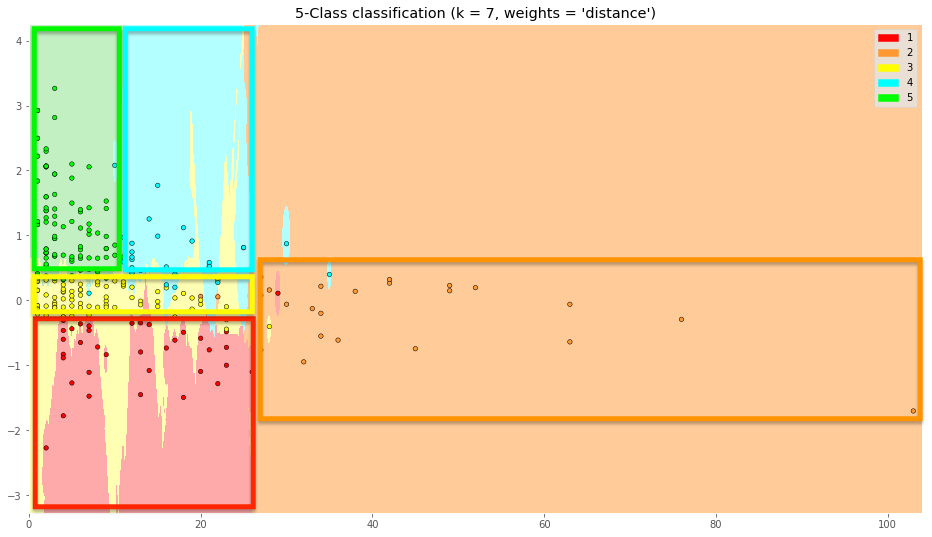

Es decir que “a ojo” una review de 20 palabras y Sentimiento 1, nos daría una valoración de 4 (zona celeste).

Con estas zonas podemos intuir ciertas características de los usuarios que usan y valoran la app:

Los usuarios que ponen 1 estrella tienen sentimiento negativo y hasta 25 palabras.
Los usuarios que ponen 2 estrellas dan muchas explicaciones (hasta 100 palabras) y su sentimiento puede variar entre negativo y algo positivo.
Los usuarios que ponen 3 estrellas son bastante neutrales en sentimientos, puesto que están en torno al cero y hasta unas 25 palabras.
Los usuarios que dan 5 estrellas son bastante positivos (de 0,5 en adelante, aproximadamente) y ponen pocas palabras (hasta 10).


**Cómo obtener el mejor valor de k**

In [36]:
# Rango de valores para k
k_range = list(range(1, 20))  # Convertir el rango a una lista
scores = []

# Evaluar el rendimiento del clasificador para diferentes valores de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Crear el gráfico con Plotly
fig = go.Figure()

# Añadir los puntos de precisión para cada valor de k
fig.add_trace(go.Scatter(
    x=k_range,
    y=scores,
    mode='markers+lines',
    marker=dict(color='blue', size=8),
    line=dict(color='blue'),
    name='Precisión'
))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Precisión del K-NN para diferentes valores de k',
    xaxis_title='Número de vecinos (k)',
    yaxis_title='Precisión',
    xaxis=dict(tickmode='array', tickvals=[i for i in range(1, 20, 5)])  # Ajustar los ticks en el eje x
)

fig.show()

Este resultado nos indica que para 5 palabras y sentimiento 1, nos valorarán la app con 5 estrellas.

In [37]:
print(clf.predict([[5, 1.0]]))

[5]


Aquí vemos que para las coordenadas 20, 0.0 hay 97% probabilidades que nos den 3 estrellas. Puedes comprobar en el gráfico anterior, que encajan en las zonas que delimitamos anteriormente.

In [39]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00249744 0.02527227 0.97223028 0.         0.        ]]


**Conclusiones del algoritmo kNN**

En este ejercicio creamos un modelo con Python para procesar y clasificar puntos de un conjunto de entrada con el algoritmo k-Nearest Neighbor. Cómo su nombre en inglés lo dice, se evaluán los “k vecinos más cercanos” para poder clasificar nuevos puntos. Al ser un algoritmo supervisado debemos contar con suficientes muestras etiquetadas para poder entrenar el modelo con buenos resultados. Este algoritmo es bastante simple y -como vimos antes- necesitamos muchos recursos de memoria y cpu para mantener el dataset “vivo” y evaluar nuevos puntos. Esto no lo hace recomendable para conjuntos de datos muy grandes. En el ejemplo, sólo utilizamos 2 dimensiones de entrada para poder graficar y ver en dos dimensiones cómo se obtienen y delimitan los grupos. Finalmente pudimos hacer nuevas predicciones y a raíz de los resultados, comprender mejor la problemática planteada.